Dimension reduction is useful in general to
0. reduce the complexity of a learning problem
1. visualize the data
2. embed data into a vector space for further processing

Auto-encoders are a good example of a dimension reduction technique (non-linear and expensive).

PCA and t-sne are other examples 

# Generalized Low Rank Models (GLRM)
M. Udell, C. Horn, R. Zadeh, and S. Boyd, Working Draft Sept 2014 <BR>
http://web.stanford.edu/~boyd/papers/glrm.html <BR>
Implementations: 
* Python (C Horn, buggy, https://github.com/cehorn/GLRM)
* Julia (M Udell, https://github.com/madeleineudell/LowRankModels.jl)
* Spark (R Zadeh, Scala, http://git.io/glrmspark)

Given Heterogeneous valued data with many missing entries:
* Visualize archetyical examples
* Cluster examples
* find correlated features
* impute missing entries
* remove suprious data points

Not necessarily the best method but a lovely general framework for conceptualizing many techniques.

## Low Rank Models
Have been used to embed heterogeneous data with missing entries into a low dimensional vector space.

Examples of popular data types include:
* Image
* Text (words and documents)
* Video

## Principle Component Analysis (PCA)

Find the best rank-k approximation to the matrix $X$ with respect to lest squared error <BR>

$minimize \|A - XY \|^2_F$

Where $X \in \mathbb{R}^{m \times k}$ and $Y \in \mathbb{R}^{k \times n}$

$A \in \mathbb{R}^{m \times n}$ $m$ data points in $n$ dimensional space (sorry)


### Singular Value Decomposition vs Principle Component Analysis
If you center the columns of $A$ then the covariance matrix is $C = A^TA/(n-1)$

The singular value decomposition returns $X = USV^T$

$C = \frac{VSU^TUSV^T}{n-1} = V \frac{S^2}{n-1}V^T$

Thus the right singular vectors are what we think of as the eigenvectors of the covariance matrix.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, manifold, decomposition
import seaborn as sns
%matplotlib inline
sns.set_context("poster")

iris = datasets.load_iris()
X = pd.DataFrame(iris.data[:,:4], columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'])
Y = pd.DataFrame(iris.target)
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}
X.head()

/home/towermint/anaconda3/envs/py2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


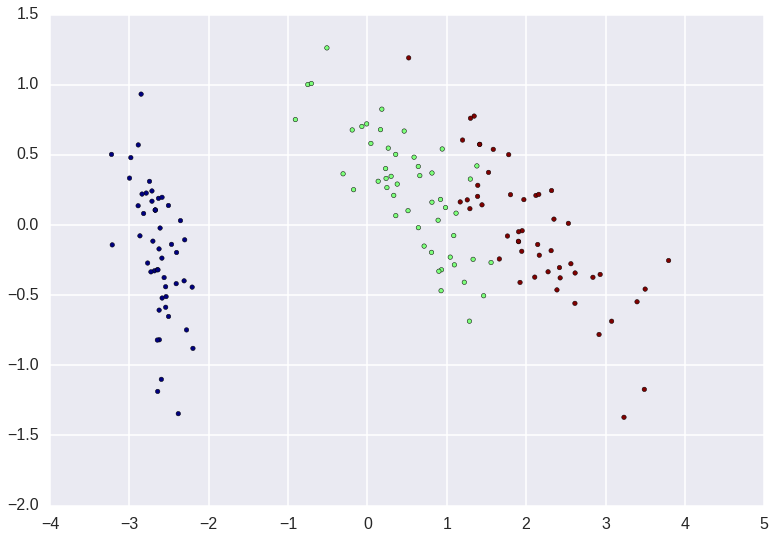

In [2]:
X_reduced =  decomposition.PCA(n_components=2).fit_transform(X)
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=Y, cmap='jet')

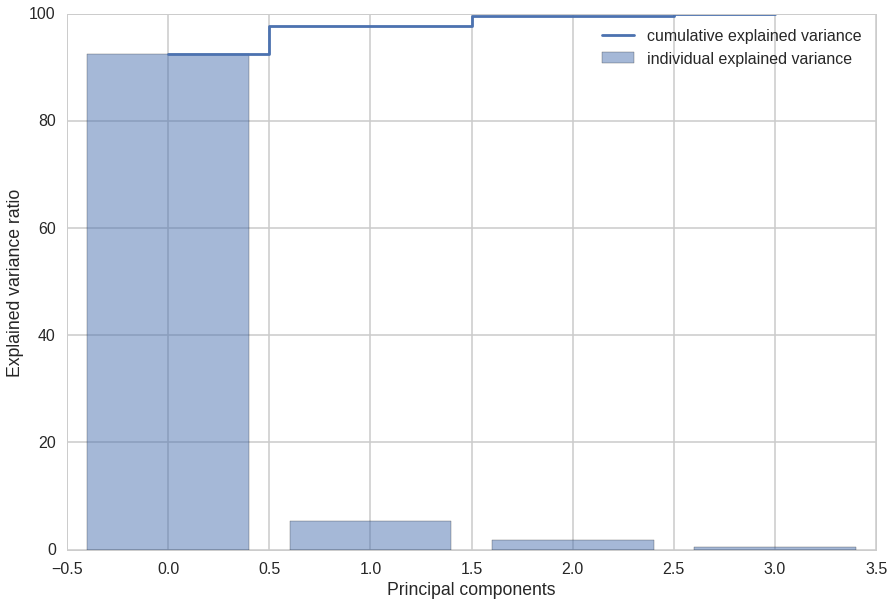

In [3]:
iris_pca =  decomposition.PCA(n_components=4).fit(X)
var_exp = iris_pca.explained_variance_ratio_*100
cum_var_exp = np.cumsum(var_exp)
with plt.style.context('seaborn-whitegrid'):
    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


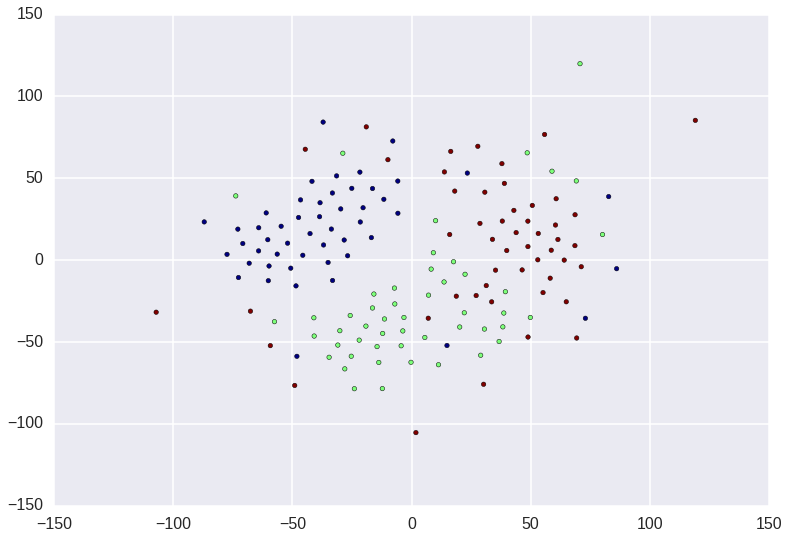

In [4]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_reduced = tsne.fit_transform(X)
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=Y, cmap='jet')

## One solution 
**1)** Take the eigendecomposition of a covariance matrix.
For a given data matrix $X_{n \times n}$, the covariance matrix is: <BR>
$C = Cov(X,X) = E[(X-E[X])(X-E[X])^T] = E[XX^T] - E[X]E[X]^T$

**2)** Compute the eigenvectors of the covariance matrix: <BR>
$C = VDV^{-1}$

**3)** Examine the proportion of variance exmplained to choose $k$




## Solve via eigendecomposition or... <BR> Directly optimize the objective function.

1. Locally optimal solution
2. More flexible objective function

### Alternating Minimization

$X^w = \underset{X}{argmin}(\sum\limits_{i=1}^m \sum\limits_{j=1}^n (A_{ij} - x_iy_j^{w-1})^2$ <BR>
$Y^w = \underset{Y}{argmin}(\sum\limits_{i=1}^m \sum\limits_{j=1}^n (A_{ij} - x_i^{w-1}y_j)^2$

Python version uses CVXPY (Stephen Boyd and Steven Diamond)
* a Python-embedded modeling language for convex optimization problems

## Regularized PCA <BR> (for interpretability)

$minimize \|A - XY \|^2_F + \gamma \|X\|^2_F + \gamma \|Y\|^2_F$

$\gamma$ is a regularization parameter.
When $\gamma = 0$ this reduced to standard PCA


### Alternating Minimization

$X^w = \underset{X}{argmin}(\sum\limits_{i=1}^m \sum\limits_{j=1}^n (A_{ij} - x_iy_j^{w-1})^2 + \gamma \sum\limits_{i=1}^m \|x_i\|^2_2)$ <BR>
$Y^w = \underset{Y}{argmin}(\sum\limits_{i=1}^m \sum\limits_{j=1}^n (A_{ij} - x_i^{w-1}y_j)^2 + \gamma \sum\limits_{j=1}^n \|y_j\|^2_2)$

## Matrix Completion <BR> (e.g. Recommender Systems)

$minimize \sum\limits_{(i,j)\in\Omega}(A_{ij} - x_i y_j)^2 + \gamma \|X\|^2_F + \gamma \|Y\|^2_F$

Summartion over $\{i,j\} \in \Omega \subset \{1,...,m\} \times \{1,...,n\}$ <BR> 
for which we have observed entries 


## Nice, but why limit yourself to the Frobenius norm?

## Good Point!

## Generalized Regularization

$minimize \|A - XY \|^2_F + r(X) + \overset{-}r(Y)$

We'll still solve it via alternating minimization.

The general loss functions allow us to encode arbitrary contraints.  

Remember the row $x_i$ can be thought of as the feature vector for the ith point in k-dimensional space

The column $y_j$ can 







## Such as non-negative matrix factorization
$r(b) = \overset{-}r(b) = 
\begin{cases}
    0,  {b \in \mathbb{R}, b\geq 0} \\
    \infty,  otherwise
\end{cases}$

Let's call that function $I_+(b)$ for future use.

Many cases have feature spaces that are inherently positive:
0. Text mining
1. Image analysis
2. Audio analysis

## Sparse PCA <BR> ...for even more interpretability
$r(b) = \overset{-}r(b) = 
\begin{cases}
    0,  cardinality(b) \leq s \\
    \infty,  otherwise
\end{cases}$



0. K-means... just because you can implement it doesn't mean you should
1. Partial assignments to mixtures (i.e. probabilities)
3. Subspace clustering
4. Sparse feature selection



## Mix and match

Sparse **and** non-negative?  No problem.

$r(b) = \overset{-}r(b) = \|x\|_1 + I_+(x)$



## You replaced the regularization functions.  Why don't you generalize the loss function?

## Good idea

## Generalized Loss Function

$minimize L(XY, A) + r(X) + \overset{-}r(Y)$

### Robust PCA

$minimize \|A - XY \|^2_1 + \gamma \|X\|^2_F + \gamma \|Y\|^2_F$

The $L_1$ norm places a less severe penalty on outliers

Arbitrary loss functions are, not surprisingly, key to fitting non-continuous data

Define a loss function: <BR>
$L_{ij}: \mathbb{R} \times \mathcal{F}_j \Rightarrow \mathbb{R}$

## Boolean PCA
for binary data $A_{ij} \in {-1,1}$ take the hinge loss function $L(u,a) = (1-au)_+$


In [5]:
def hinge(a,u):
    x = 1- a*u
    if(x<0):
        x=0
    return(x)

uRange = range(-3,4,1)
a1 = [hinge(1,u) for u in uRange]
aNeg = [hinge(-1,u) for u in uRange]


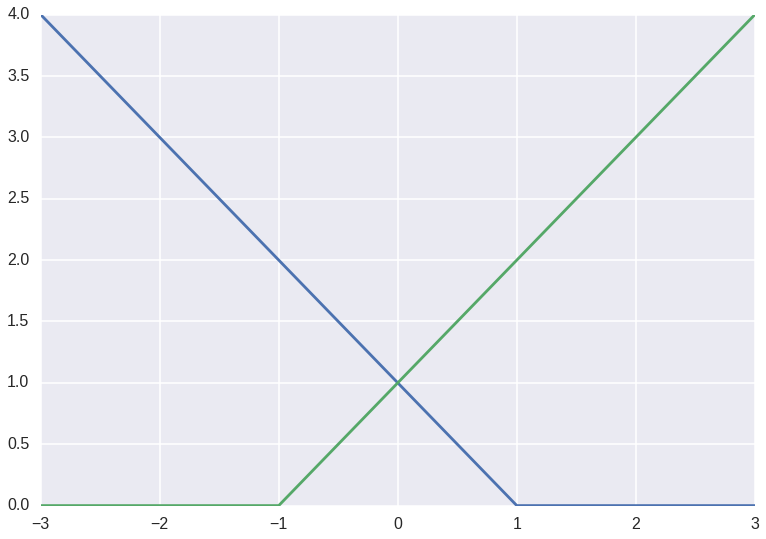

In [6]:
plt.plot(uRange, a1)
plt.plot(uRange, aNeg)

## Ordinal PCA

for ordinal data $A_{ij} \in {1,2,...,d}$ take the ordinal hinge loss function <BR> 
$L_d(u,a) = \sum\limits_{a^1=1}^{a-1}(1-u+a^1)+\sum\limits_{a^1=a+1}^{d}(1-u-a^1)+$



## Questions?  Suggestions?  Ideas?